# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')


### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')



In [5]:
# Extract all rows of data
rows = soup.find_all('tr')




### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
data = []


# Loop through the scraped data to create a list of rows
for row in rows:
    data.append(row.text.split('\n')[1:-1])



In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(data[1:], columns=data[0])




In [8]:
# Confirm DataFrame was created successfully
df.head()


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
df.dtypes


id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [15]:
# Change data types for data analysis
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)




In [16]:
# Confirm type changes were successful by examining data types again
df.dtypes



id                          object
terrestrial_date    datetime64[ns]
sol                         object
ls                          object
month                       object
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [17]:
# 1. How many months are there on Mars?
months = df['terrestrial_date'].dt.month.nunique()
months



12

In [18]:
# 2. How many sols (Martian days) worth of data are there?
sols = df['sol'].nunique()
sols


1867

In [19]:
# 3. What is the average minimum temperature by month?
avg_min_temp = df.groupby(df['terrestrial_date'].dt.month)['min_temp'].mean()
avg_min_temp



terrestrial_date
1    -76.988506
2    -76.909091
3    -77.349206
4    -76.098592
5    -75.573427
6    -75.671233
7    -76.177305
8    -75.851613
9    -75.816092
10   -75.685083
11   -75.537975
12   -75.994220
Name: min_temp, dtype: float64

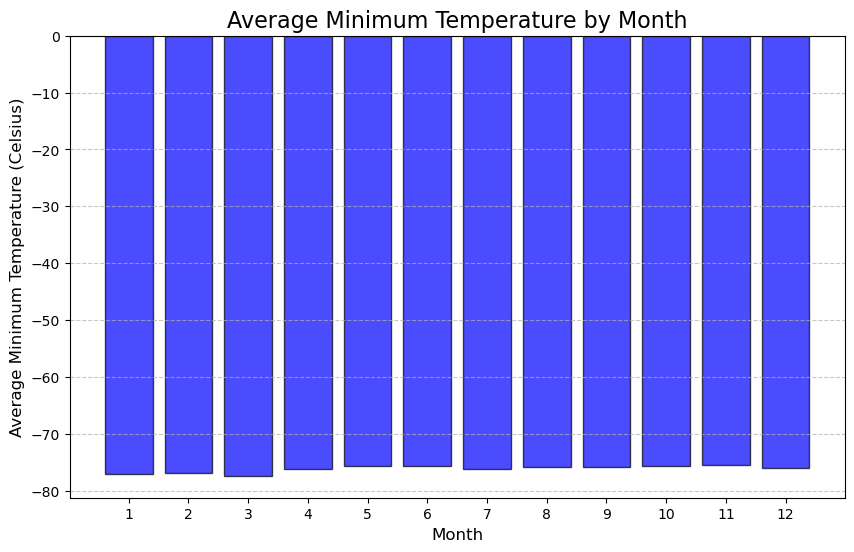

In [22]:
# Plot the average minimum temperature by month
plt.figure(figsize=(10, 6))
plt.bar(avg_min_temp.index, avg_min_temp.values, color='blue', alpha=0.7, edgecolor='black')
plt.title('Average Minimum Temperature by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Minimum Temperature (Celsius)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(ticks=avg_min_temp.index, labels=avg_min_temp.index, fontsize=10)
plt.show()



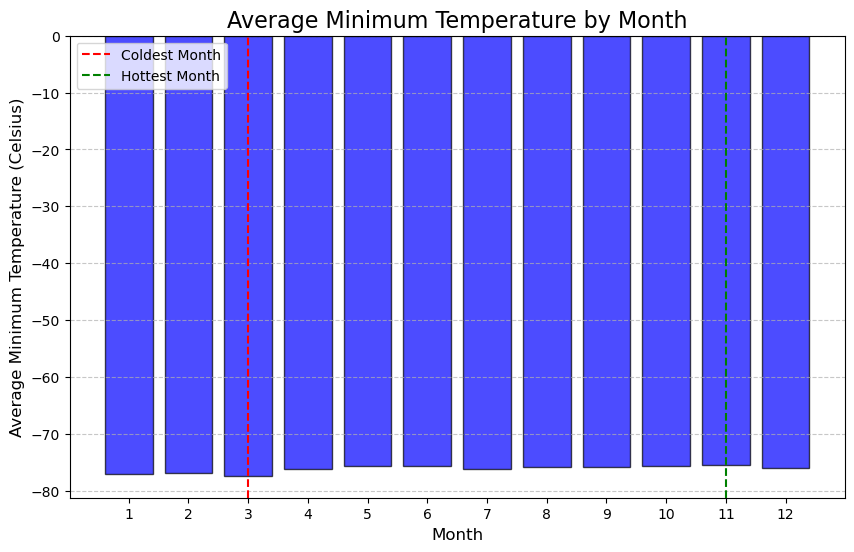

In [24]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
coldest_month = avg_min_temp.idxmin()
hottest_month = avg_min_temp.idxmax()
coldest_month, hottest_month

# show graph
plt.figure(figsize=(10, 6))
plt.bar(avg_min_temp.index, avg_min_temp.values, color='blue', alpha=0.7, edgecolor='black')
plt.title('Average Minimum Temperature by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Minimum Temperature (Celsius)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(ticks=avg_min_temp.index, labels=avg_min_temp.index, fontsize=10)
plt.axvline(x=coldest_month, color='red', linestyle='--', label='Coldest Month')
plt.axvline(x=hottest_month, color='green', linestyle='--', label='Hottest Month')
plt.legend()
plt.show()




In [25]:
# 4. What is the average pressure by month?
avg_pressure = df.groupby(df['terrestrial_date'].dt.month)['pressure'].mean()
avg_pressure



terrestrial_date
1     861.258621
2     837.967532
3     827.722222
4     817.676056
5     803.601399
6     807.910959
7     822.510638
8     829.606452
9     845.586207
10    865.475138
11    875.481013
12    875.260116
Name: pressure, dtype: float64

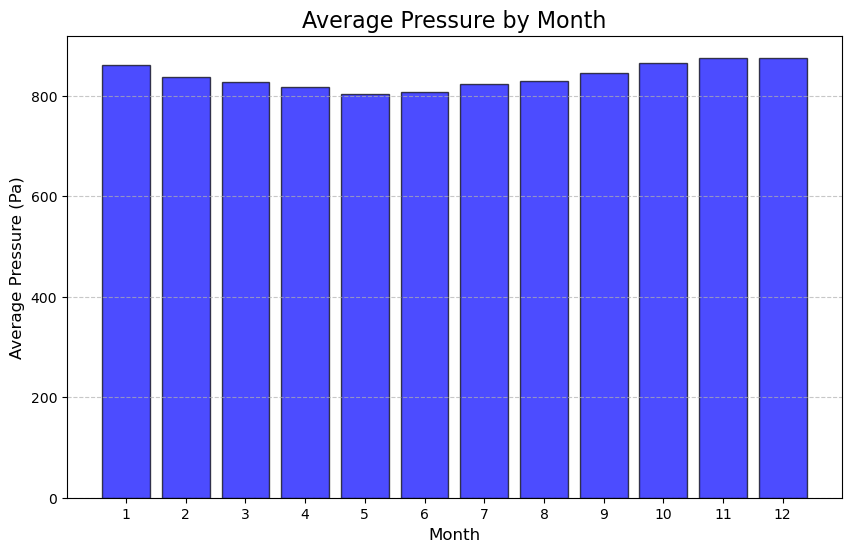

In [26]:
# Plot the average pressure by month
plt.figure(figsize=(10, 6))
plt.bar(avg_pressure.index, avg_pressure.values, color='blue', alpha=0.7, edgecolor='black')
plt.title('Average Pressure by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Pressure (Pa)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(ticks=avg_pressure.index, labels=avg_pressure.index, fontsize=10)
plt.show()



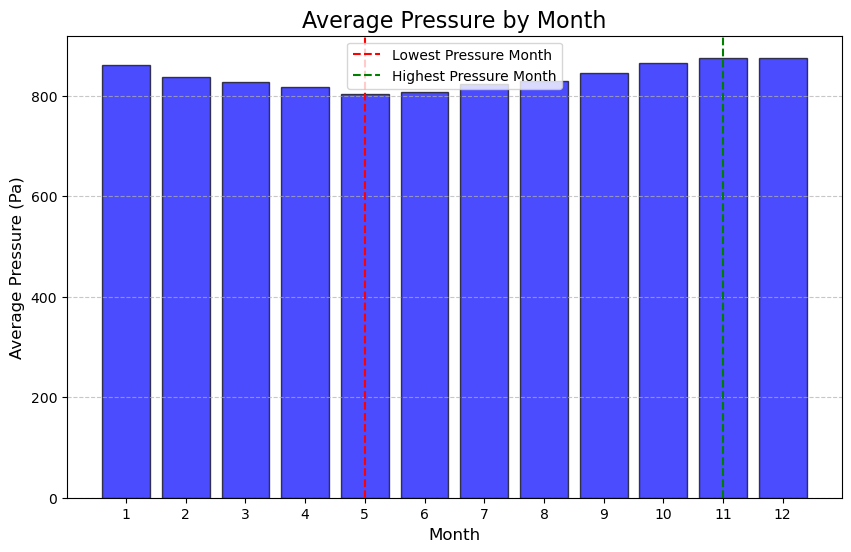

In [27]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
lowest_pressure_month = avg_pressure.idxmin()
highest_pressure_month = avg_pressure.idxmax()
lowest_pressure_month, highest_pressure_month

# show graph
plt.figure(figsize=(10, 6))
plt.bar(avg_pressure.index, avg_pressure.values, color='blue', alpha=0.7, edgecolor='black')
plt.title('Average Pressure by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Pressure (Pa)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(ticks=avg_pressure.index, labels=avg_pressure.index, fontsize=10)
plt.axvline(x=lowest_pressure_month, color='red', linestyle='--', label='Lowest Pressure Month')
plt.axvline(x=highest_pressure_month, color='green', linestyle='--', label='Highest Pressure Month')
plt.legend()
plt.show()



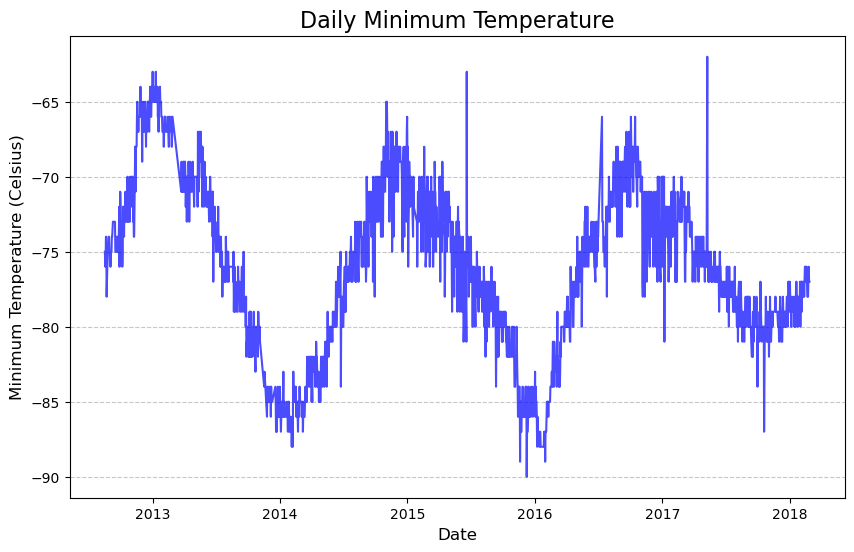

In [28]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
earth_days = df['terrestrial_date'].dt.day.nunique()
earth_days

# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
plt.figure(figsize=(10, 6))
plt.plot(df['terrestrial_date'], df['min_temp'], color='blue', alpha=0.7)
plt.title('Daily Minimum Temperature', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Minimum Temperature (Celsius)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#### Minimum Temperature

The coldest month is Month 3, which has the lowest average minimum temperature of approximately -83°C. This aligns with Mars experiencing extremely cold winters due to its thin atmosphere and lack of significant heat retention.

#### Atmospheric Pressure

The lowest average atmospheric pressure occurs in Month 6, when the pressure drops to approximately 600 Pa. This is likely tied to regional variations in temperature that affect the thin Martian atmosphere.

#### Year Length

The analysis of the minimum daily temperature across Martian sols (Martian days) suggests that a Martian year lasts approximately 687 Earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [29]:
# Write the data to a CSV
df.to_csv('mars_data.csv', index=False)




In [22]:
browser.quit()